# Carregamento dos dados

In [14]:
import pandas as pd

# Definindo o caminho para o arquivo CSV com os dados das análises de aplicativos
file_path = '../Base/apps_reviews_validacao.xlsx - apps_reviews.csv'

# Carregando os dados do arquivo CSV em um DataFrame do pandas
# Usecols: Especifica as colunas a serem carregadas do arquivo
# 'reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment' são as colunas selecionadas
# A última coluna nula é ignorada
comentarios = pd.read_csv(file_path, usecols=['reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment'])

# Pré-processamento

In [15]:
import sys
import os

# Adicionando um diretório ao caminho de busca de módulos do Python
# os.path.abspath(os.path.join('..', 'lib')): Cria o caminho absoluto para o diretório 'lib' que está um nível acima do diretório atual
# sys.path.append(): Adiciona o diretório especificado ao caminho de busca de módulos, permitindo importar módulos localizados nesse diretório
sys.path.append(os.path.abspath(os.path.join('..', 'lib')))

<p style="color:green">Usar função criada para pré-processamento.</p> 

In [16]:
import pre_processamento as pp

# Chamando a função 'pre_processar_dataframe' do módulo 'pre_processamento'
# A função é usada para pré-processar a coluna 'content' do DataFrame 'comentarios'
# Executa todas operações de limpeza contidos em Base/Base_trabalho_final.ipynb
comentarios = pp.pre_processar_dataframe(comentarios, 'content')

# Extração da features (representação de texto em formato vetorial)

<p style="color:green">A seguir, faremos a instanciação do método que fará a representação do texto usando o modelo TF-IDF.</p> 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Criando uma instância do TfidfVectorizer
# O TfidfVectorizer converte uma coleção de documentos de texto em uma matriz de características TF-IDF
# TF-IDF é uma técnica que avalia a importância de uma palavra em um documento em relação a um corpus de documentos
tfidf_vectorizer = TfidfVectorizer()

In [18]:
# Transformando o texto da coluna 'content' em uma matriz TF-IDF
# fit_transform: Ajusta o modelo aos dados de texto e transforma os dados em uma matriz esparsa de características TF-IDF
# tfidf_matrix: Matriz onde cada linha representa um documento e cada coluna representa uma palavra, com valores TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(comentarios['content'])

In [19]:
# Convertendo a matriz TF-IDF em um DataFrame do pandas
# tfidf_matrix.toarray(): Converte a matriz esparsa TF-IDF em uma matriz densa (array)
# tfidf_vectorizer.get_feature_names_out(): Obtém os nomes das características (palavras) do vetor TF-IDF para usar como colunas do DataFrame
# tfidf_df: DataFrame onde cada linha representa um documento e cada coluna representa uma palavra, com valores TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Exibindo o DataFrame para verificar a transformação
tfidf_df

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Treinamento e teste

<p style="color:green">Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (tfidf_df) em um conjunto de teste e outro treinamento. </p>

In [20]:
# Categoria a serem previstas
categorias = comentarios[['sentiment_polarity', 'sentiment']]

In [21]:
from sklearn.model_selection import train_test_split

# Dividindo o conjunto de dados em conjuntos de treino e teste
# test_size=0.2: 20% dos dados serão usados para teste, e o restante para treino.
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, categorias, test_size=0.2)

# Extraindo as colunas 'sentiment_polarity' e 'sentiment' dos conjuntos de treino e teste
y_train_polarity = y_train['sentiment_polarity']
y_test_polarity = y_test['sentiment_polarity']
y_train_sentiment = y_train['sentiment']
y_test_sentiment = y_test['sentiment']


In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Criando e treinando um classificador K-Nearest Neighbors (KNN) para prever a polaridade do sentimento
# n_neighbors=5: O número de vizinhos a considerar ao classificar um novo ponto
knn_polarity = KNeighborsClassifier(n_neighbors=5)
knn_polarity.fit(X_train, y_train_polarity)

# Fazendo previsões sobre o conjunto de teste para polaridade do sentimento
predicoes_polarity = knn_polarity.predict(X_test)

# Criando e treinando um classificador K-Nearest Neighbors (KNN) para prever o sentimento
# n_neighbors=5: O número de vizinhos a considerar ao classificar um novo ponto
knn_sentiment = KNeighborsClassifier(n_neighbors=5)
knn_sentiment.fit(X_train, y_train_sentiment)

# Fazendo previsões sobre o conjunto de teste para sentimento
predicoes_sentiment = knn_sentiment.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador KNN para a previsão do sentimento
print("\nAvaliação para 'sentiment':")
print(classification_report(y_test_sentiment, predicoes_sentiment))


Avaliação para 'sentiment':
              precision    recall  f1-score   support

       anger       0.53      0.64      0.58       162
     disgust       0.48      0.54      0.51       182
        fear       0.00      0.00      0.00        11
   happiness       0.51      0.55      0.53        58
     neutral       0.40      0.09      0.14        23
     sadness       0.56      0.45      0.50       167

    accuracy                           0.52       603
   macro avg       0.41      0.38      0.38       603
weighted avg       0.51      0.52      0.50       603



c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

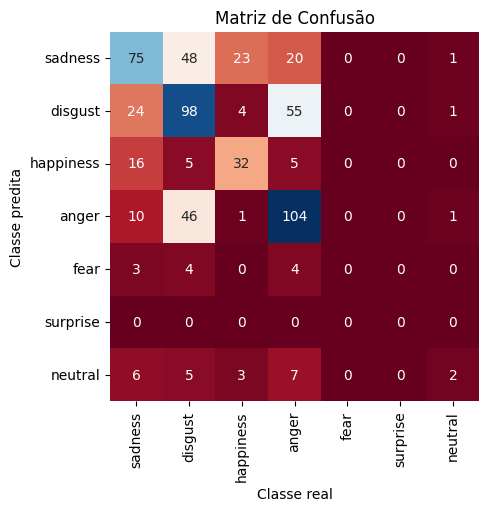

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos para o sentimento, que serão usados nos eixos da matriz de confusão
sentiment_labels = comentarios['sentiment'].unique()

# Calculando a matriz de confusão
# y_test_sentiment: Rótulos reais dos dados de teste para o sentimento
# predicoes_sentiment: Rótulos previstos pelo classificador para o sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_sentiment, predicoes_sentiment, labels=sentiment_labels)

# Criando um gráfico da matriz de confusão usando seaborn
# annot=True: Adiciona anotações com os valores das células
# fmt='d': Formata os valores das anotações como inteiros
# cmap='RdBu': Define o mapa de cores para o gráfico
# cbar=False: Remove a barra de cores
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels,
            yticklabels=sentiment_labels)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico

In [25]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador KNN para a previsão da polaridade
print("\nAvaliação para 'polarity':")
print(classification_report(y_test_polarity, predicoes_polarity))


Avaliação para 'polarity':
              precision    recall  f1-score   support

    negative       0.78      0.86      0.82       355
     neutral       0.50      0.09      0.15        23
    positive       0.73      0.68      0.70       225

    accuracy                           0.76       603
   macro avg       0.67      0.54      0.56       603
weighted avg       0.75      0.76      0.75       603



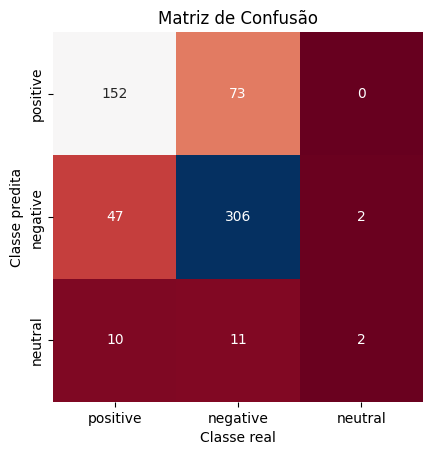

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos para a polaridade do sentimento, que serão usados nos eixos da matriz de confusão
sentiment_labels_pol = comentarios['sentiment_polarity'].unique()

# Calculando a matriz de confusão para avaliar a performance do classificador KNN para a polaridade do sentimento
# y_test_polarity: Rótulos reais dos dados de teste para a polaridade do sentimento
# predicoes_polarity: Rótulos previstos pelo classificador KNN para a polaridade do sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_polarity, predicoes_polarity, labels=sentiment_labels_pol)

# Criando um gráfico da matriz de confusão usando seaborn
# annot=True: Adiciona anotações com os valores das células
# fmt='d': Formata os valores das anotações como inteiros
# cmap='RdBu': Define o mapa de cores para o gráfico
# cbar=False: Remove a barra de cores
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels_pol,
            yticklabels=sentiment_labels_pol)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico